# Lets Grow More VIP - Feb 2022

## Beginner Level Task - Iris Flower Classification ML Project
### Dataset Link - https://archive.ics.uci.edu/ml/datasets/Iris

## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model Evaluation
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
#Loading Iris Dataset
df = pd.read_csv("iris.data")

In [3]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [5]:
# Changing the Column Names for better understanding
columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
df.columns = columns
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Exploring Data 

In [6]:
# Checking number of rows and columns in the Dataset
print('Number of rows and columns in the Dataset: ',df.shape)

Number of rows and columns in the Dataset:  (149, 5)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  149 non-null    float64
 1   Sepal_Width   149 non-null    float64
 2   Petal_Length  149 non-null    float64
 3   Petal_Width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Checking for Missing Values
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [10]:
df.nunique()

Sepal_Length    35
Sepal_Width     23
Petal_Length    43
Petal_Width     22
Species          3
dtype: int64

In [11]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

## Visualization

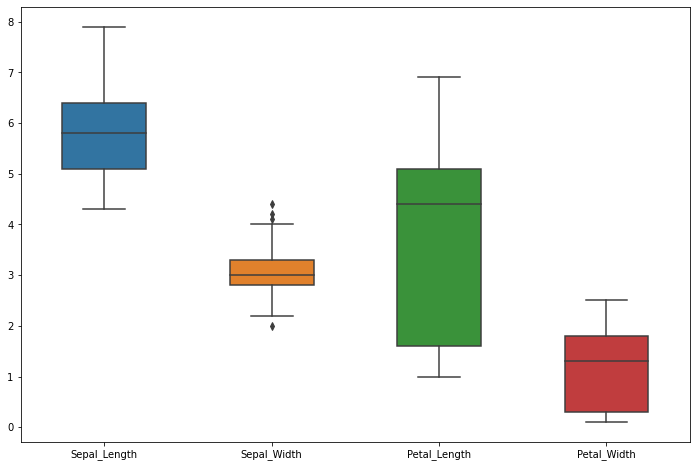

In [12]:
#Checking Outliers
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, width = 0.5, fliersize = 5)
plt.show()

In [13]:
# Checking correlation
corr = df.corr()
corr

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.103784,0.871283,0.816971
Sepal_Width,-0.103784,1.000000,-0.415218,-0.350733
Petal_Length,0.871283,-0.415218,1.000000,0.962314
Petal_Width,0.816971,-0.350733,0.962314,1.000000


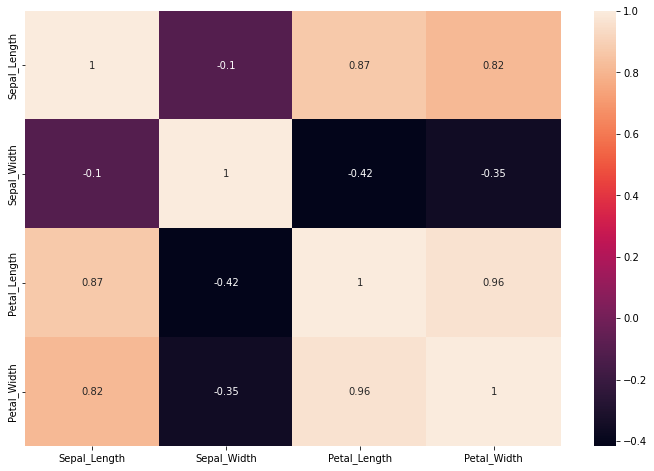

In [14]:
# PLotting Correlation into Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

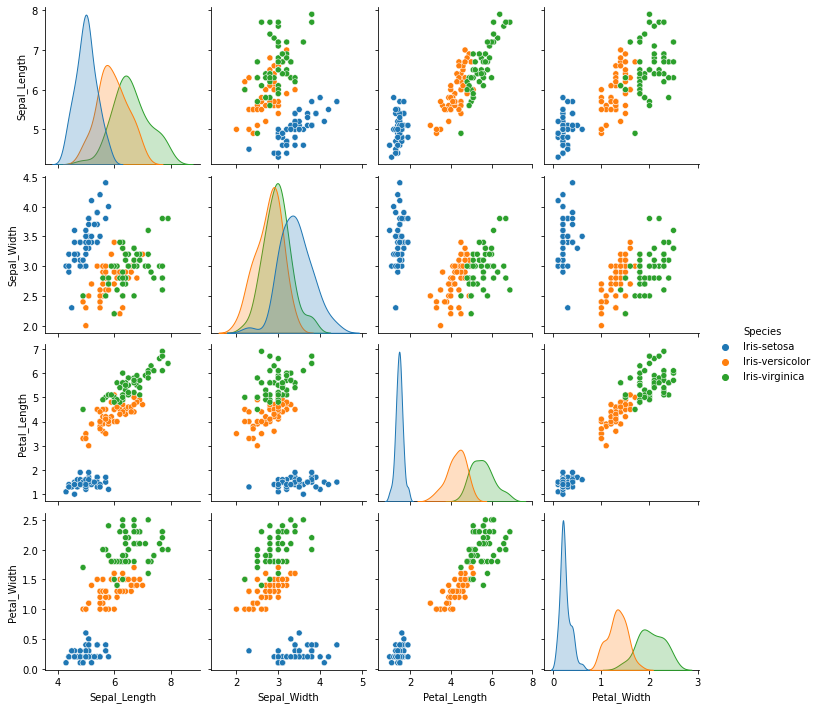

In [15]:
#Pairplot of Species
sns.pairplot(df, hue='Species')
plt.show()

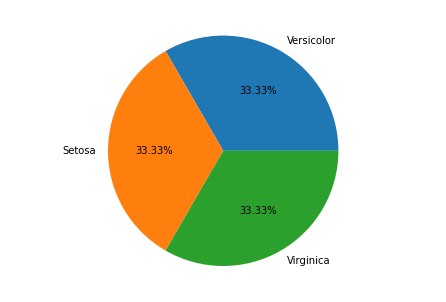

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')

plt.show()

## Building Models

In [17]:
# Splitting the Data
X = df.drop(['Species'], axis = 1) # Independent feature
y = df['Species'] # Dependent feature
print(X.shape)
print(y.shape)

(149, 4)
(149,)


In [18]:
#Spliting into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119, 4)
(119,)
(30, 4)
(30,)


In [19]:
#Using Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy: ',accuracy_score(prediction,y_test))

Accuracy:  0.9333333333333333


In [20]:
#Using Support Vector
model1 = SVC()
model1.fit(X_train,y_train)

pred_y = model1.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,pred_y))

Accuracy:  0.9666666666666667


In [21]:
#Using KNN Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred2))

Accuracy Score:  0.9666666666666667


In [22]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN'],
    'Score': [0.9333,0.9666,0.9666]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.9666,Support Vector Machines
0.9666,KNN
0.9333,Logistic Regression
